
> Surbhi

> MT19055

# **ASSIGNMENT-01**

In [2]:
import requests
import bs4
from bs4 import BeautifulSoup
import re
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
import operator 
from collections import Counter

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Question 1** 

Q1(a)

In [4]:
#links used for extracting recipes data deom tarladalal.com
urls = ["https://www.tarladalal.com/Maa-Ki-Dal-33369r",
        "https://www.tarladalal.com/Upma--Quick-Upma-Recipe-Breakfast-Upma-38658r",
        "https://www.tarladalal.com/Pav-Bhaji-2813r",
        "https://www.tarladalal.com/Tava-Pulao-Tawa-Pulao-Recipe-33427r",
        "https://www.tarladalal.com/Momos-22253r"]

`Used for printing recipe`

---

In [36]:
def generate_recipes(urls):
  #Data extraction using Beautiful Soup and Printing it in the Recipe Format
  data =[]
  food = []
  recipeNumber=1
  for links in urls:
    print("\n___________________________________RECIPE___________________________________________") 
    recipes_info={}
    src = requests.get(links) #checking if link is valid or not
    print("\nRecipesNumber: ",recipeNumber) #Giving RecipeID to each recipe 
    soup = BeautifulSoup(src.content,'lxml')
    title = soup.find('title') #extracting title of recipe
    s = title.string.lstrip() #Apply some preprocessing on title extraction
    p = re.compile('[^|]*')
    t = p.match(s).group()
    p = re.compile('[^,]*')
    print("\n",p.match(t).group())
    #Recipe Ingredients are extracted using tags:
    #1.we recipe item list in each division 
    #2.Find anchor tags in recipe item list
    #3.Extracted out text from the each span and store in list
    ingredientsTags = soup.find(id="rcpinglist") #extracting ingredients from tags
    ingredients = ingredientsTags.find_all("span",itemprop="recipeIngredient")
    print("\nIngredients Section")
    ingrdnts = []
    for s in ingredients:
      anchorIngredients = s.find_all("a") 
      for each_a in anchorIngredients:
        ing=[]
        item = each_a.find("span")
        print(item.text)  #extraction of text  
        ing.append(recipeNumber) #list storing [recipeNumber,Ingredient]
        ing.append(item.text)
        ingrdnts.append(item.text) #storing ingredients of each recipe
        food.append(ing) #list storing lists having items in form [recipeNumber1,Ingredients1],[recipeNumber1,Ingredient2],... (list of lists)
    recipes_info['Ingredients'] = ingrdnts #storing in dictionary named recipe_info
    #Recipe Cooking Instructions are extracted 
    print("\nCooking Instructions: ")
    instructionTag = soup.find(id='ctl00_cntrightpanel_pnlRcpMethod')
    instructions = instructionTag.find_all('span', itemprop='text')
    ins=[]
    count=1
    for s in instructions:
      print("\n",count,".",s.text) 
      count+=1
      ins.append(s.text)
    recipes_info['instructions'] = ins
    recipeNumber+=1
    data.append(recipes_info) #store all the information inside the data list
  return food,data,recipes_info

In [37]:
food,data, recipe_info = generate_recipes(urls)


___________________________________RECIPE___________________________________________

RecipesNumber:  1

 maa ki dal recipe 

Ingredients Section
whole urad (whole black lentil)
rajma (kidney beans)
oil
butter
cumin seeds (jeera)
cinnamon (dalchini)
cloves (laung / lavang)
cardamoms (elaichi)
green chillies
chopped onions
ginger-garlic (adrak-lehsun) paste
chilli powder
turmeric powder (haldi)
tomato pulp
garam masala
salt
fresh cream
parathas
butter naan
jeera rice

Cooking Instructions: 

 1 . To make maa ki dal, heat the oil and butter in a pressure cooker and add the cumin seeds.

 2 . When the seeds crackle, add the cinnamon, cloves, cardamom, green chillies, onions and ginger-garlic paste and sauté on a medium flame for 2 minutes.

 3 . Add the chilli powder, turmeric powder and tomato pulp, mix well and cook on a medium flame for 2 minutes, while stirring occasionally.

 4 . Add the garam masala, urad, rajma, salt and 1 cup of water, mix well and pressure cook on high flame for

Q1(b)

In [38]:
#Format 1: 
#RecipeID - list of all ingredients
def generateRecipe_Ing(data):
  print("\n____________________________________Format-1___________________________________________________\n")
  id = np.arange(1,6)
  frame = pd.DataFrame(data)
  frame.insert(0,"Recipe_Id",id,True)
  frame.drop("instructions",axis=1, inplace=True)
  print(frame)
  return frame

In [33]:
#Format 2:
#RecipeNumber - IngredientNumber

def generateOneToOne(food):
  print("\n_______________________________________Format-2__________________________________________________\n")
  RI = pd.DataFrame(food, columns = ['RID', 'Ingredient'])  
  print(RI)
  return RI

In [39]:
frame = generateRecipe_Ing(data)
RI = generateOneToOne(food)


____________________________________Format-1___________________________________________________

   Recipe_Id                                        Ingredients
0          1  [whole urad (whole black lentil), rajma (kidne...
1          2  [semolina (rava / sooji), oil, mustard seeds (...
2          3  [ladi pav, butter, chopped cauliflower, green ...
3          4  [butter, cumin seeds (jeera), red chilli-garli...
4          5  [plain flour (maida), salt, oil, chopped garli...

_______________________________________Format-2__________________________________________________

    RID                       Ingredient
0     1  whole urad (whole black lentil)
1     1             rajma (kidney beans)
2     1                              oil
3     1                           butter
4     1              cumin seeds (jeera)
..  ...                              ...
74    5                   schezuan sauce
75    5                            sugar
76    5              plain flour (maida)
77    5 

Q1(c):

> If we represent data in **(recipeNumber - ingredientNumber)** format then:

*   We may loose the quantity and units of ingredient needed for a recipe.
*   It doesn't contain cooking instruction also, it may happen that resultant recipe will leads to some other recipe.
*   We don't know in which form ingredient must be used for a particular recipe for example: grated,chopped etc.
*   There are some ingredients which are of different types or category like capsicum (red,green and yellow), salts(basalt salt and kosher salt) thus they are considered into the same categories. 
*   Every recipe follow the  particular steps which describes in which order ingredients to be used. So with the absence of cooking instructions we loose that information. 
*   In cooking instructions utensils are also mentioned, we loose that information also
*   It may happen that the end quantity is way more or less than the original or desired quantity. Suppose we want to make tea for 2 people i.e, 2 cups but because of absence of quantity and instrructions we end up making a tea of 6 peoples.
* Data scrapping may contains noisy data. Since in recipes it is generally given that served with like(rice,nan) in case of Maa ki daal *(Above recipe)*


Q1(d):

> Using NLP algorithm we can extract most details from the recipes. We can use Name Entity Recoginition(NER) and then POS tagging for example:(capsicum: NN and chopping: VBD) to segregate ingredients and process.Further segregate ingredients into ingredient name, quanity, units,form and comments(chopped,grated etc.)
 

 ***Question 2:***

In [40]:
#Loading of jason file 
def getData():
    with open ('/content/drive/My Drive/Assignment1_CGAS/train.json', encoding="utf8") as f:
        d = json.load(f)
        length = len(d)
        print("Total Number of Recipies: ", length)
        data=[] #list for storing the file data
        for i in range(len(d)):
            data.append({'id':d[i]['id'], 'cuisine':d[i]['cuisine'], 'ingredients':d[i]['ingredients'],'recipe_size':len(d[i]['ingredients'])})
            #it stores recipeId, cuisine, ingredientList,recipeSize for each recipe
    return data

In [41]:
#finding total number unique cuisine from the all recipes
def unique_cuisine(data):
  uniqueCuisine = set()
  for j in range(len(data)):
    uniqueCuisine.add(data[j]["cuisine"])
  print("Total Number of Cuisine: ",len(uniqueCuisine))
  return uniqueCuisine

In [42]:
#finding total number unique ingredients from the all recipes
def unique_ingredients(data):
  uniqueIngredients = set()
  for i in range(len(data)):
    for j in data[i]["ingredients"]:
      uniqueIngredients.add(j)
  print("Total Number of unique Ingredients", len(uniqueIngredients))
  return uniqueIngredients

In [43]:
#finding total number recipes in each cuisine
def NumberOfRecipesCuisine(data):
  recipe_cuisine={} #dictionary storing cuisine and total number of recipes of each cuisine
  for i in range(len(data)):
    if data[i]['cuisine'] not in recipe_cuisine:
      recipe_cuisine[data[i]['cuisine']]=1
    else:
      recipe_cuisine[data[i]['cuisine']]+=1 
  print("Number of Recipes of each Cuisine : ",recipe_cuisine)
  return recipe_cuisine

In [44]:
#Plot the statistics (bar plot) of number of recipes for each cuisine.
def generatePlot(recipe_cuisine):
  fig = plt.figure(figsize=(20,10))
  ax = fig.add_axes([0,0,1,1])
  plt.title('Number of recipes for each cuisine')
  ax.set_ylabel('Recipies for each Cuisine')
  ax.set_xlabel('Cuisines')
  langs=[]
  for recipie in recipe_cuisine.keys(): #using recipe_cuisine dictionary 
    langs.append(recipie)
  students = []
  for val in recipe_cuisine.values():
    students.append(val)
  ax.bar(langs,students)
  plt.xticks(rotation=45)
  plt.tick_params(labelsize=11)
  plt.show()

In [60]:
#finding total number of recipes having same size 
def RecDistributionCuisine(df):
  recipe_size = {} #storing size of each recipe and total number of recipes having that size
  for ing in df['recipe_size']:
    if ing not in recipe_size:
      recipe_size[ing]=1
    else:
      recipe_size[ing]+=1
  print("\n Recipe Size Distributions: \n", recipe_size)
  #print("df:",df.shape[0])
  for i in recipe_size:
    recipe_size[i] = (recipe_size[i]/df.shape[0])*100 #normalizing recipe sizes with total number of recipes and computing percentage
  print("\n Recipe Size Distribution in Percentage: \n", recipe_size)
  return recipe_size

In [55]:
def generatePlot2(recipe_size):
  recipe_sort = dict(sorted(recipe_size.items(), key=lambda x: x[0])) #sorting recipe sizes
  X=[] #storing recipe_sizes
  Y=[] #number of recipes having that size
  for i in recipe_sort:
    X.append(i)
    Y.append(recipe_sort[i])
  plt.scatter(X, Y)
  plt.plot(X,Y)
  plt.title('Recipe-Size Distribution')
  plt.ylabel('Percentage')
  plt.xlabel('Recipe Size')
  plt.grid()

In [56]:
#Finding recipe size distribution for each cuisine (Similar work done above but here in this function we're doing it for each cuisine having same size)
def cuisineDist(recipe_cuisine,df):
  cuisine_dist={}
  for cuisine in recipe_cuisine:
    #print(recipe_cuisine[i])
    cuisine_size={}
    each_c = df['recipe_size'].loc[df['cuisine']==cuisine] #storing each row of cuisine with  recipe sizes
    #print(cuisine,each_c)
    for c in each_c:
      if c not in cuisine_size:
        cuisine_size[c]=1
      else:
        cuisine_size[c]+=1
    for cus in cuisine_size:
      cuisine_size[cus] = (cuisine_size[cus]/recipe_cuisine[cuisine])*100 #normalizing
    sort_cuisine = dict(sorted(cuisine_size.items(), key= lambda x:x[0])) #sorting 
    cuisine_dist[cuisine] = sort_cuisine #dictionary of dictionary storing cuisine then size and recipes having that size
  return sort_cuisine,cuisine_dist

In [64]:
def generatePlot3(cuisine_dist):
  fig = plt.figure(figsize=(20,10))
  for cuisine in cuisine_dist:
    X=[] 
    Y=[]
    for id in cuisine_dist[cuisine]:
      X.append(id)
      Y.append(cuisine_dist[cuisine][id])
    plt.scatter(X,Y)
    plt.plot(X,Y,label=cuisine)
  plt.title('Cuisine-RecipeSize Distribution')
  plt.ylabel('Percentages of Each Cuisine')
  plt.xlabel('Number of Recipies in Each Cuisine')
  plt.legend()
  plt.grid()

In [69]:
#Cumulative distribution of recipe size
def RecipeSizeDistPlot(recipe_size_dist):
  recipe_sort = dict(sorted(recipe_size_dist.items(), key=lambda x: x[0],reverse = True)) #sorting recipes_size_distribution in descending order.
  cumulative={}
  count = 0
  for i in recipe_sort:
    #print(recipe_sort[i])
    count+=recipe_sort[i] #finding cumulative value(N>=9)--> 9+8+7... so on
    cumulative[i] = count
  print("Cumulative Scores: ",cumulative)
  plt.title('Cummulative Distribution')
  plt.xlabel('Rank(popularity)')
  plt.ylabel('Freq of use')
  plt.grid()
  plt.plot(list(cumulative.keys()),list(cumulative.values()),'-o')


 Q2(a):

Total Number of Recipies:  39774
Total Number of Cuisine:  20
Total Number of unique Ingredients 6714
__________________________________________________________________________________________________________________________________________________

 Q2(b):

Number of Recipes of each Cuisine :  {'greek': 1175, 'southern_us': 4320, 'filipino': 755, 'indian': 3003, 'jamaican': 526, 'spanish': 989, 'italian': 7838, 'mexican': 6438, 'chinese': 2673, 'british': 804, 'thai': 1539, 'vietnamese': 825, 'cajun_creole': 1546, 'brazilian': 467, 'french': 2646, 'japanese': 1423, 'irish': 667, 'korean': 830, 'moroccan': 821, 'russian': 489}


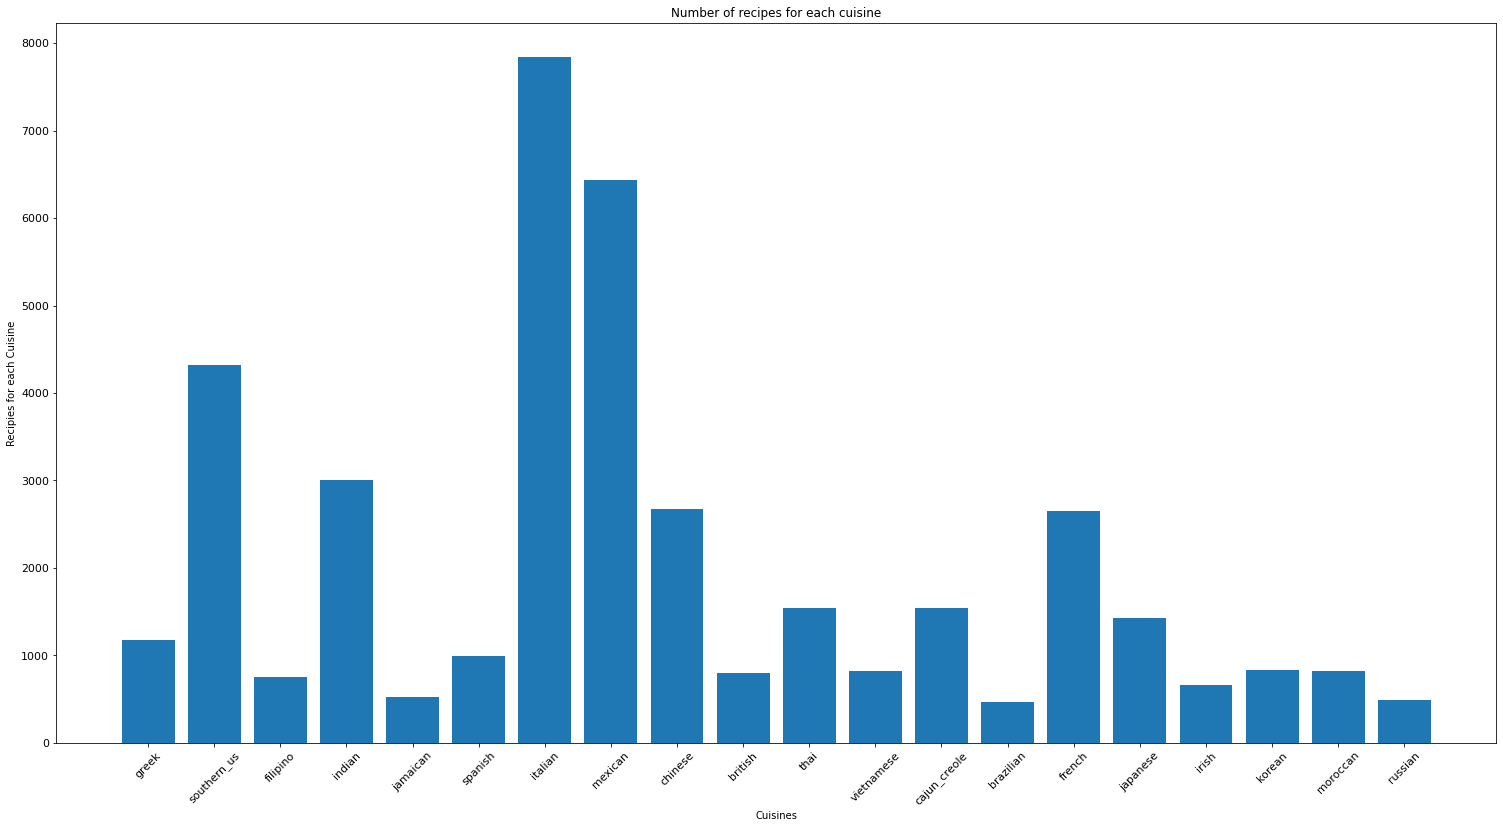

__________________________________________________________________________________________________________________________________________________

 Q2(c):


 Recipe Size Distributions: 
 {9: 3753, 11: 3512, 12: 3146, 4: 1128, 20: 504, 13: 2698, 10: 3677, 6: 2662, 15: 1809, 17: 1160, 14: 2253, 5: 1891, 16: 1439, 8: 3556, 7: 3329, 22: 218, 3: 549, 2: 193, 18: 879, 24: 91, 38: 2, 21: 313, 40: 3, 23: 141, 19: 610, 25: 72, 26: 46, 27: 20, 1: 22, 34: 3, 28: 27, 30: 15, 29: 21, 32: 4, 36: 4, 49: 2, 31: 11, 35: 3, 65: 1, 33: 4, 52: 1, 59: 1, 43: 1}

 Recipe Size Distribution in Percentage: 
 {9: 9.435812339719414, 11: 8.829888872127519, 12: 7.909689747070951, 4: 2.836023532961231, 20: 1.2671594508975714, 13: 6.783325790717553, 10: 9.244732739980892, 6: 6.692814401367728, 15: 4.548197314828783, 17: 2.916478101272188, 14: 5.664504450143309, 5: 4.75436214612561, 16: 3.6179413687333435, 8: 8.940513903555086, 7: 8.369789309599236, 22: 0.5480967466183939, 3: 1.3802986875848544, 2: 0.485241615125458

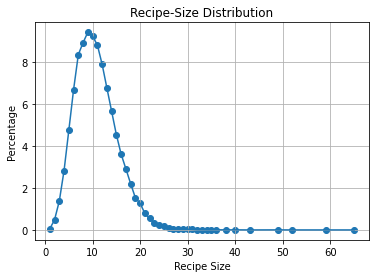

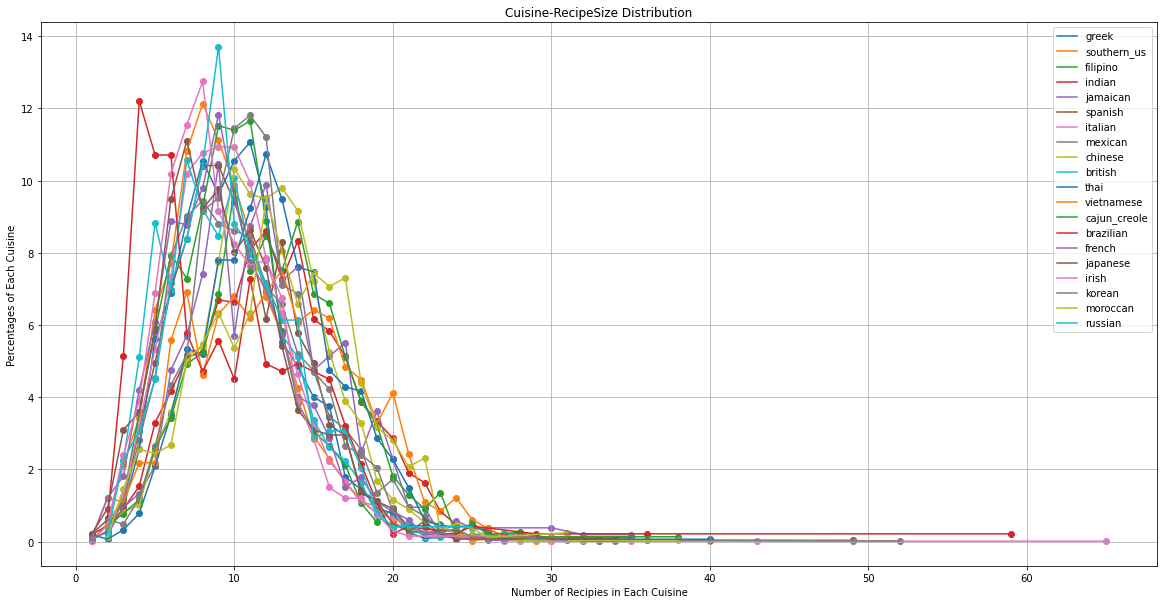

In [72]:
print("\n Q2(a):\n")
filter_data = getData()
df = pd.DataFrame(filter_data)
uniqueCuisine = unique_cuisine(filter_data)
uniqueIngredients = unique_ingredients(filter_data)
print("__________________________________________________________________________________________________________________________________________________")
print("\n Q2(b):\n")
recipe_cuisine = NumberOfRecipesCuisine(filter_data)
generatePlot(recipe_cuisine)
print("__________________________________________________________________________________________________________________________________________________")
print("\n Q2(c):\n")
recipe_size_dist = RecDistributionCuisine(df)
generatePlot2(recipe_size_dist)
sort_cuisine,cuisine_dist= cuisineDist(recipe_cuisine,df)
generatePlot3(cuisine_dist)

*Q2(d):*


> Following are the interpretation:

*   Recipes of smaller sizes are easy to transmit as they are very simple.
*   Larger size recipes are difficult to reproduce and are very rare.
*   Best size for recipe is having 10 ingredients.
*   Thus from the below cumulatives values we can conclude that there exists around 57% of recipes having size 10.
*   There exists a hardly 3% of recipes having size greater 20.
*   Slope from 10 to 20 is very steep, thus after this point, area under curve is less because less recipes have size more than 20.
*   We can also say that area under curve is more for recipe sizes less than 20 i.e, most of the recipes having ingredients less than 20.

Cumulative Scores:  {65: 0.0025142052597174032, 59: 0.0050284105194348064, 52: 0.00754261577915221, 49: 0.012571026298587015, 43: 0.015085231558304418, 40: 0.022627847337456628, 38: 0.027656257856891436, 36: 0.037713078895761046, 35: 0.045255694674913256, 34: 0.05279831045406547, 33: 0.06285513149293508, 32: 0.07291195253180469, 31: 0.10056821038869612, 30: 0.13828128928445718, 29: 0.19107959973852265, 28: 0.2589631417508925, 27: 0.3092472469452406, 26: 0.42490068889224114, 25: 0.6059234675918942, 24: 0.8347161462261778, 23: 1.1892190878463318, 22: 1.7373158344647257, 21: 2.524262080756273, 20: 3.791421531653844, 19: 5.32508674008146, 18: 7.535073163373058, 17: 10.451551264645246, 16: 14.06949263337859, 15: 18.617689948207374, 14: 24.282194398350683, 13: 31.065520189068238, 12: 38.97520993613919, 11: 47.805098808266706, 10: 57.049831548247596, 9: 66.48564388796702, 8: 75.4261577915221, 7: 83.79594710112134, 6: 90.48876150248907, 5: 95.24312364861468, 4: 98.07914718157592, 3: 99.4594458

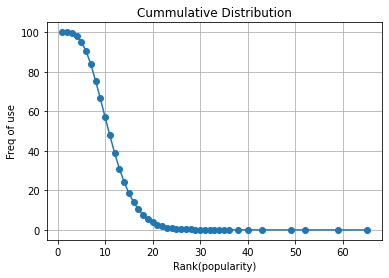

In [71]:
RecipeSizeDistPlot(recipe_size_dist)

 ***Question 3***

In [78]:
#Finding frequency of each ingredient 
def IngredientFreq(df):
  tf={} #storing ingredient-frequency
  count=0
  for each_recipe in df['ingredients']:
    for each_ing in range(len(each_recipe)):
      #if(each_recipe[each_ing]=='onions'):
        #count+=1
      #print(each_recipe[each_ing])
      if each_recipe[each_ing] not in tf:
        tf[each_recipe[each_ing]]=1
      else:
        tf[each_recipe[each_ing]]+=1
  d = max(tf.items(), key=operator.itemgetter(1))[1] #Finding most ppular ingredient
  for i in tf:
    tf[i] = tf[i]/d #normalizing
  tf_sort = sorted(tf.items(),key=lambda x: x[1],reverse=True) #Sorting the term frequency in descending order, So that most popular ingredient comes first
  #for i in tf:
    #tf[i] = tf[i]/len(filter_data)
  return tf,tf_sort

In [75]:
#Plotting Frequency-Rank distribution 
def generatePlotFRDist(tf, tf_sort): 
  X=np.arange(1,6715)
  #X=[math.log10(i) for i in X]
  Y=[]
  for i in range(len(tf_sort)):
    Y.append(tf_sort[i][1])
  #Y=[math.log10(i) for i in Y]
  plt.title("Frequency-Rank Distribution")
  plt.xlabel("Rank")
  plt.ylabel("Frequency")
  plt.loglog(X,Y)
  plt.plot(X,Y,color='r')

In [120]:
from collections import Counter 
#Finding most common ingredient
def top10Ing(tf):
  k =  Counter(tf) 
  most_occur = k.most_common(10) 
  print("Top 10 ingredients:\n",most_occur,"\n") 

In [144]:
#Frequency Rank Distribution for each cuisine
def IngredientRankDistPlot(recipe_cuisine,df):
  ingredient_rank={} #stores dictionaries of each cuisine having ingredient as key and frequency as value.
  fig = plt.figure(figsize=(20,10))
  for cuisine in recipe_cuisine:
    each_c = df.loc[df['cuisine']==cuisine]
    li = each_c['ingredients'].tolist() #Converting in list
    flat_list = [item for sublist in li for item in sublist] #flatten the list
    ingredient_count = dict(Counter(flat_list)) #Finding ingredient count of each ingredient using Counter
    denominator = max(ingredient_count.items(), key=operator.itemgetter(1))[1] #Most popular ingredient
    for i in ingredient_count:
      ingredient_count[i] = ingredient_count[i]/denominator #normalizing
    ingredient_rank = dict(sorted(ingredient_count.items(),key=lambda x: x[1],reverse=True)) #Reverse Sorting most popular at first
    print("\n Most Common Ingredient in ",cuisine, " ", max(ingredient_rank.items(), key=operator.itemgetter(1)),", Total Ingrdients: ", len(ingredient_rank))
    #print(ingredient_rank)
    X = np.arange(1,len(ingredient_rank)+1)
    #print(X)
    #X=[math.log10(i) for i in X]
    Y=list(ingredient_rank.values())
    #Y=[math.log10(i) for i in Y]
    #print(Y)
    plt.loglog(X,Y)
    plt.plot(X,Y,label=cuisine)
  plt.title("Ingredient-Rank Distribution")
  plt.xlabel("Rank")
  plt.ylabel("Frequency")
  plt.legend()
  plt.show()

Top 10 ingredients:
 [('salt', 1.0), ('onions', 0.4416865200288105), ('olive oil', 0.4416865200288105), ('water', 0.4131530832733115), ('garlic', 0.4088869189428777), ('sugar', 0.35647404288326223), ('garlic cloves', 0.34555931076513935), ('butter', 0.2686021386226384), ('ground black pepper', 0.26511164053410163), ('all-purpose flour', 0.25663471660479803)] 

_______________________________________________________________________________________________________________________________________________

 Most Common Ingredient in  greek   ('salt', 1.0) , Total Ingrdients:  1198

 Most Common Ingredient in  southern_us   ('salt', 1.0) , Total Ingrdients:  2462

 Most Common Ingredient in  filipino   ('salt', 1.0) , Total Ingrdients:  947

 Most Common Ingredient in  indian   ('salt', 1.0) , Total Ingrdients:  1664

 Most Common Ingredient in  jamaican   ('salt', 1.0) , Total Ingrdients:  877

 Most Common Ingredient in  spanish   ('salt', 1.0) , Total Ingrdients:  1263

 Most Common Ingr

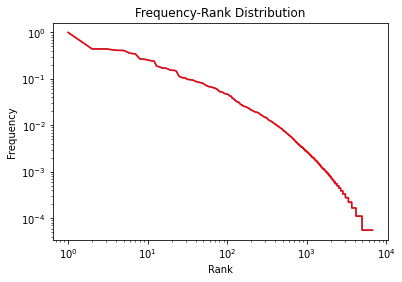

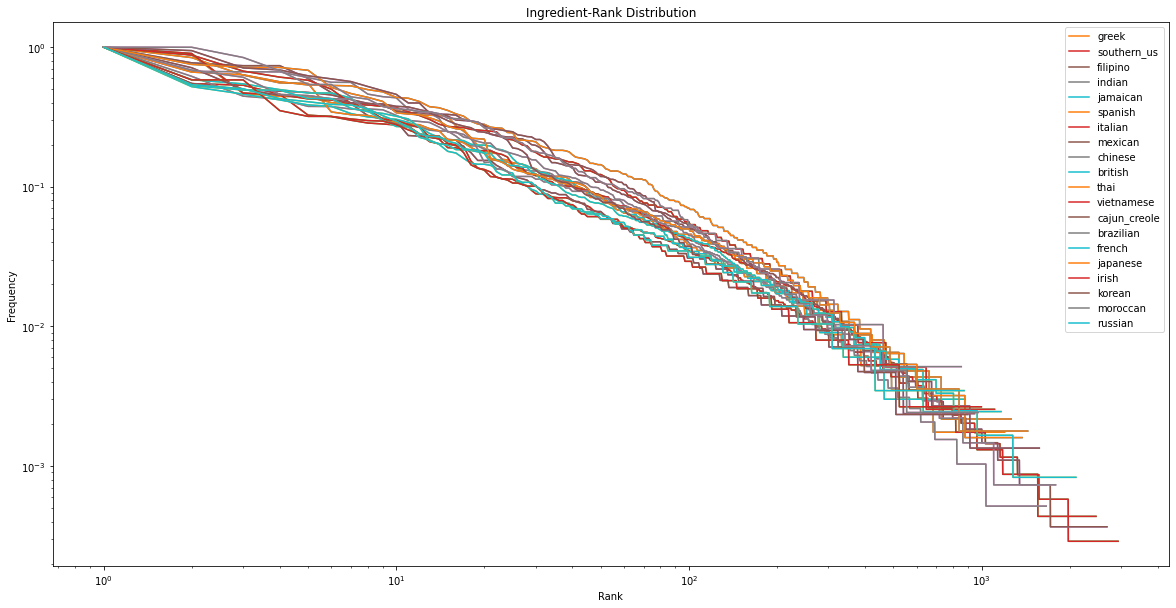

In [145]:
tf,tf_sort = IngredientFreq(df)
generatePlotFRDist(tf,tf_sort)
top10Ing(tf)
print("_______________________________________________________________________________________________________________________________________________")
IngredientRankDistPlot(recipe_cuisine,df)

Q3(a):


> Following are the inpretetation:
*   Most common ingredient among all recipes is salt.
*   It is expontentionally decreasing function.
*   As we can see even though graph is monotonously decreasing but the least value never reaches to 0. Since it follows power law distribution. 

Q3(d):


> Following are the interpretations:


*   The most common ingredient **salt** which is present in almost all recipes and 15 out of 20 cuisines.
*   No ingredient has frequency equal to 0. 
*   Italian Cuisine has most number of ingredients
*   In thai and viatnamese cuisine most frequently used ingredient is **fish sause** .
*   **Soya Sause** is frequently used ingredient in japanese,chinese and korean cuisines.
*   The normalized frequency follows a power distribution suggesting the
presence of skewed use/popularity of a few ingredients.
*   The frequency-rank graph is monotonously decreasing function which indicates uniform use of each ingredient.
*   It interesting that each cuisine follow the same power law, suggesting that most popular ingredient may be different for every cuisine but only few ingredients dominates over each cuisine as stated above.